<a href="https://colab.research.google.com/github/zarrarkhawaja123/IMDb-Movies-Reviews-Sentiment-Analysis/blob/main/sentiment_classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk

In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv('/content/IMDBDataset.csv')
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = " ".join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text
data['review'] = data['review'].apply(preprocess_text)

In [ ]:

X = data['review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


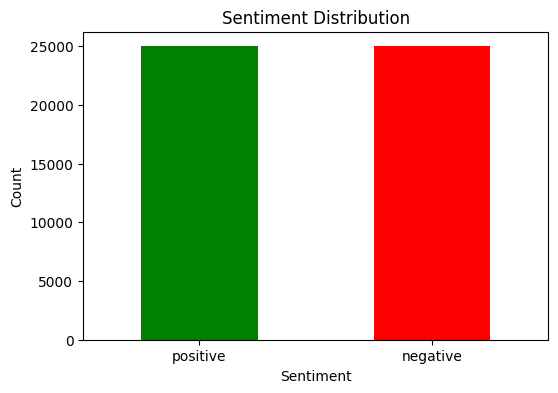

In [ ]:
# EDA: Visualizing sentiment distribution
plt.figure(figsize=(6, 4))
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:

# Tokenization and padding
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
print("Tokenization and Padding Done!")

Tokenization and Padding Done!


In [ ]:
# Build LSTM model
embedding_dim = 100
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(lstm_model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train model
history = lstm_model.fit(
    X_train_pad, y_train,
    epochs=7,
    batch_size=64,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

Epoch 1/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 389s 620ms/step - accuracy: 0.7834 - loss: 0.4761 - val_accuracy: 0.8663 - val_loss: 0.3380
Epoch 2/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 307s 491ms/step - accuracy: 0.8898 - loss: 0.2798 - val_accuracy: 0.8673 - val_loss: 0.3110
Epoch 3/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 415ms/step - accuracy: 0.9113 - loss: 0.2313 - val_accuracy: 0.8721 - val_loss: 0.3110
Epoch 4/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 232s 372ms/step - accuracy: 0.9316 - loss: 0.1926 - val_accuracy: 0.8672 - val_loss: 0.3450
Epoch 5/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 420ms/step - accuracy: 0.9422 - loss: 0.1643 - val_accuracy: 0.8671 - val_loss: 0.3463
Epoch 6/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 273s 436ms/step - accuracy: 0.9546 - loss: 0.1313 - val_accuracy: 0.8720 - val_loss: 0.3722
Epoch 7/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 273s 437ms/step - accuracy: 0.9670 - loss: 0.1015 - val_accuracy: 0.8673 - val_loss: 0.4128


In [ ]:
# Evaluate model
y_pred = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step
Accuracy: 0.8673
Precision: 0.8510
Recall: 0.8930
F1 Score: 0.8715
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      4961
           1       0.85      0.89      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



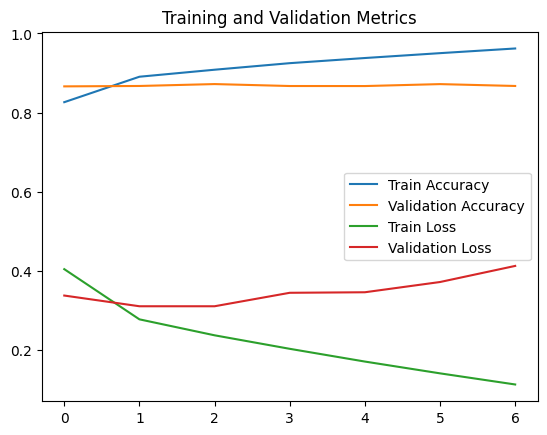

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Metrics')
plt.show()